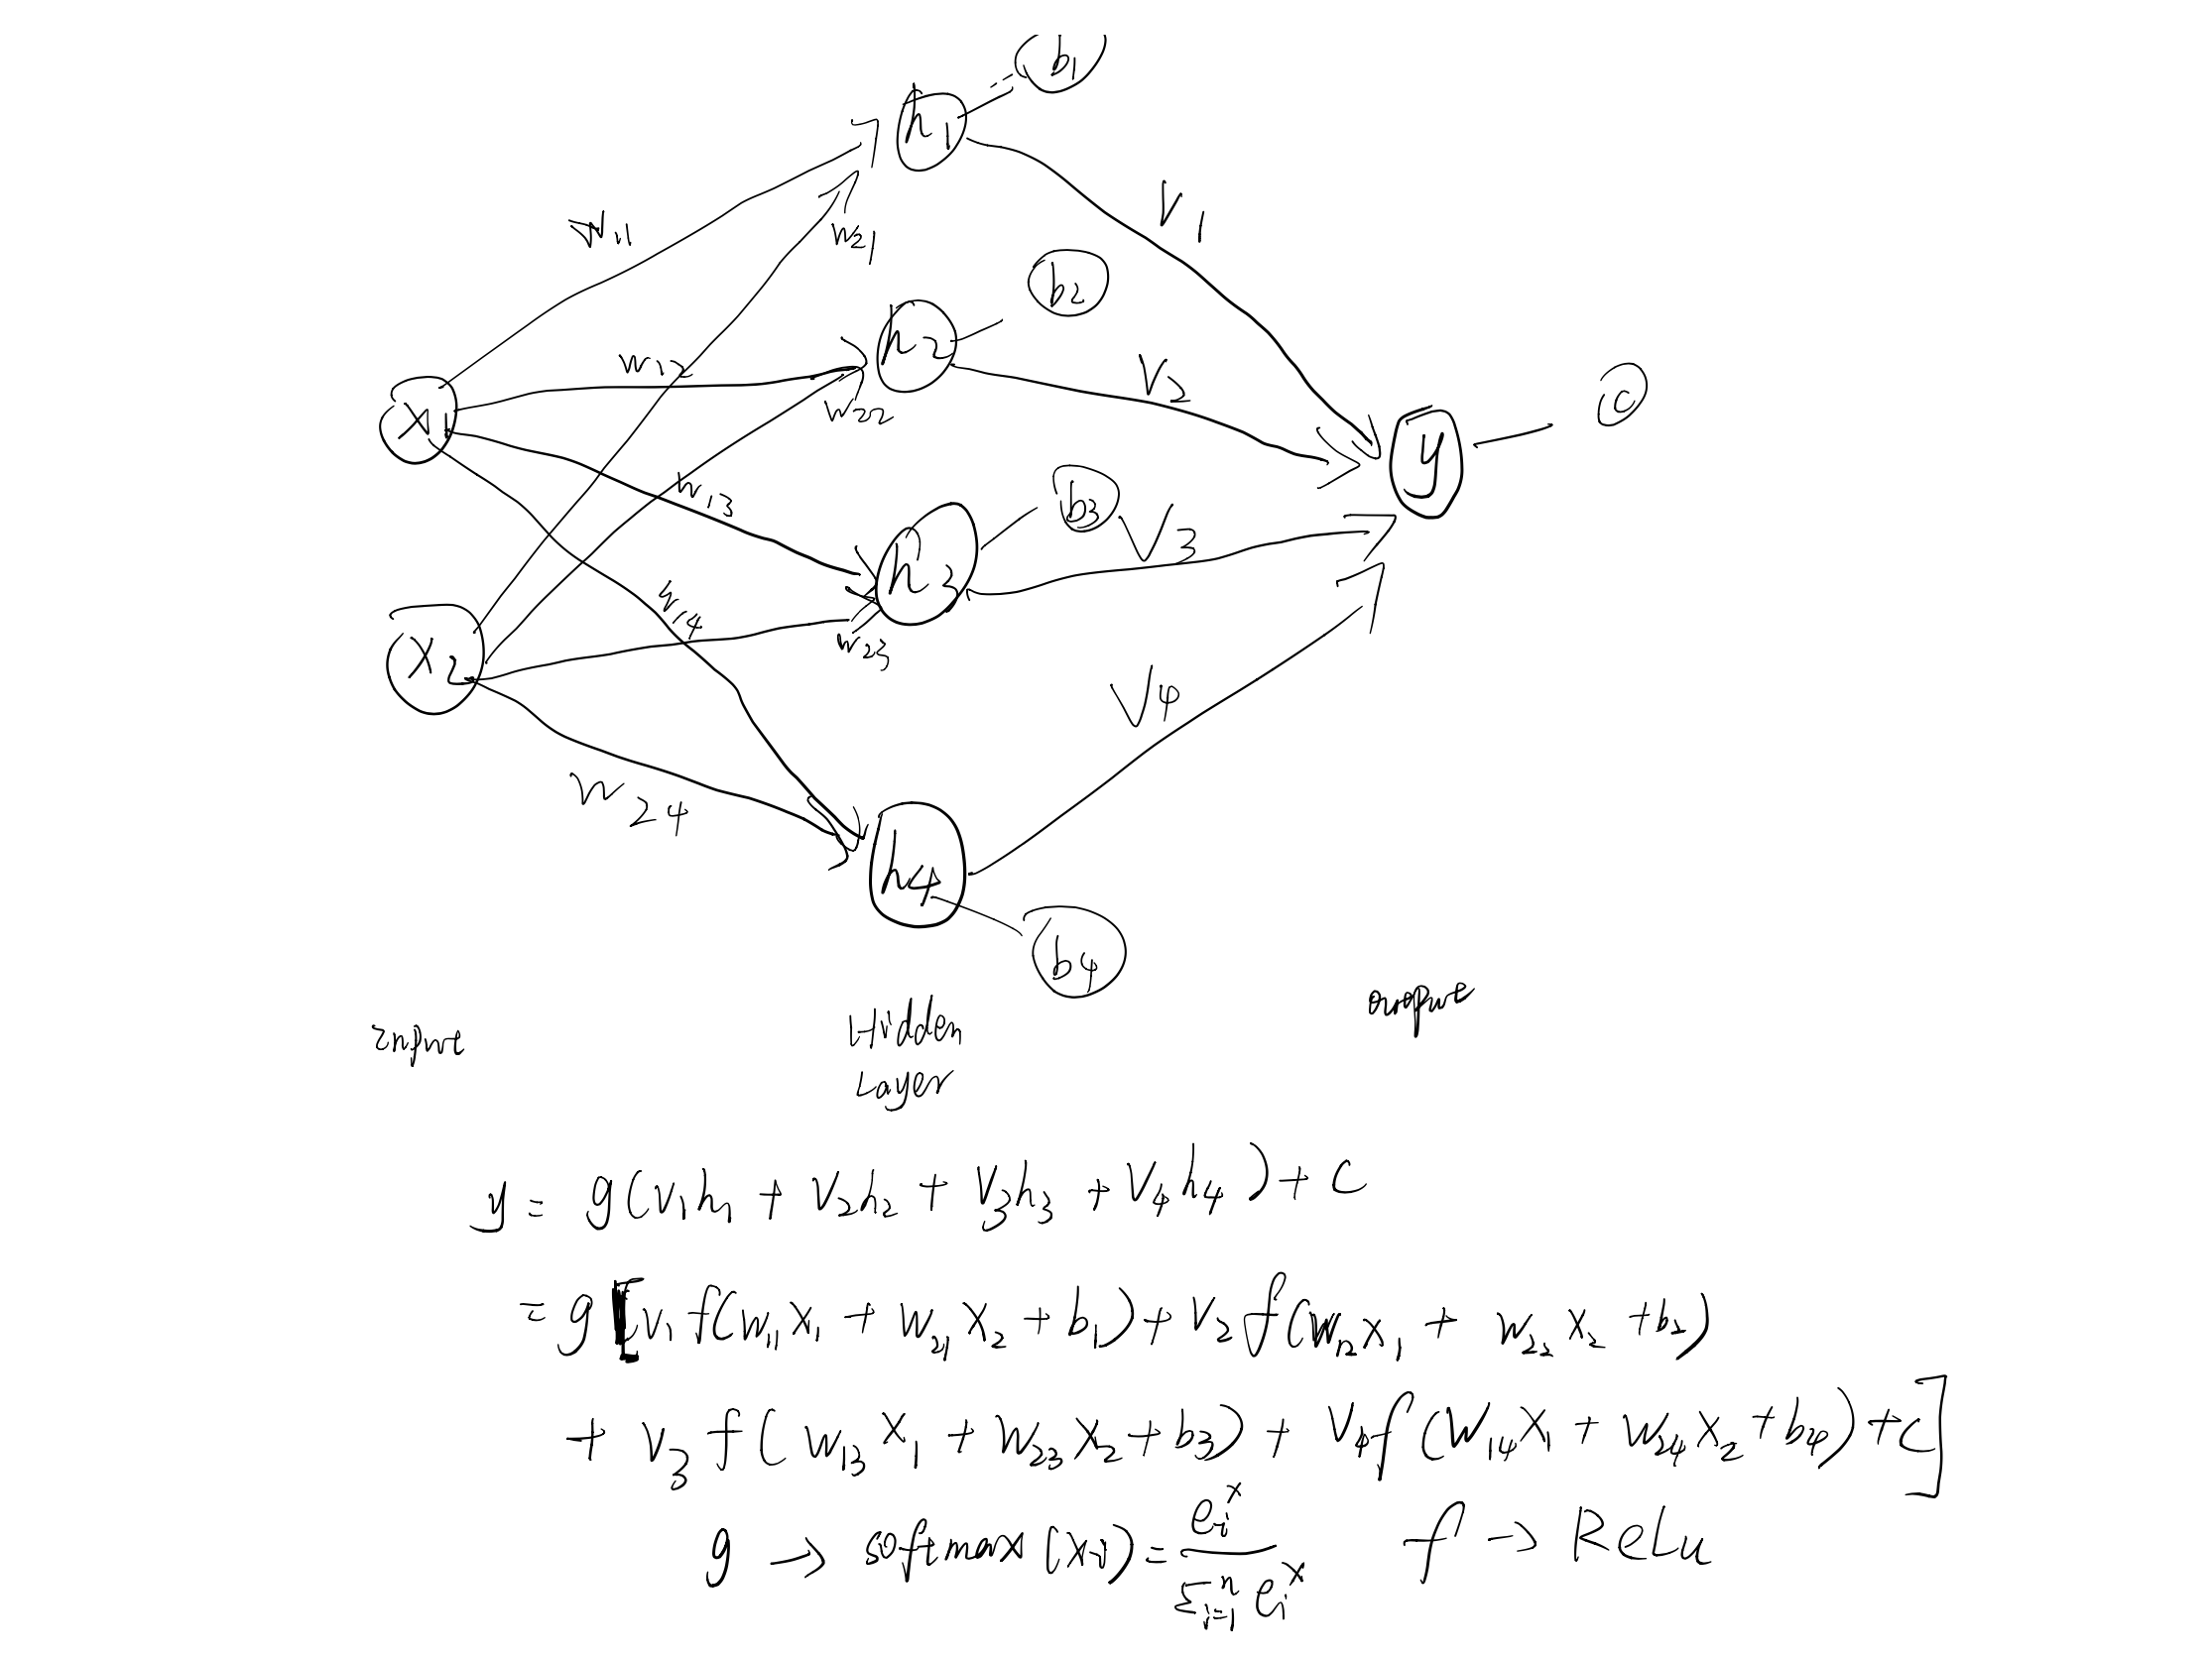

In [1]:
#1.1&1.2
from IPython.display import Image
Image("1.jpeg")

In [2]:
#1.3
def relu(x):
    return np.maximum(x,0)

def sigmoid(z):
    return 1 / (1 + np.exp(-np.array(z)))

def ff_nn_2_ReLu(x,w1,v,b,c):
    a = np.dot(x,w1)+b
    h1 = relu(a)
    y = sigmoid(np.dot(h1,v)+c)
    return y

In [3]:
#1.4
import numpy as np

x = np.array([[1,-1],[0,-1],[0,1]])
w1 = np.array([[1,-1,0,1],[0,0,0.5,1]])
b = np.array([0,0,1,0])
v = np.array([[1,0,-1,1]]).T
c = np.array([1])

ff_nn_2_ReLu(x,w1,v,b,c)

array([[0.81757448],
       [0.62245933],
       [0.62245933]])

# P2

#2.1
$
\frac{df(x,y)}{dx} = -3x^2-100(2y^2 - x)  \\
\frac{df(x,y)}{dy} = 400y(2y^2-x)
$

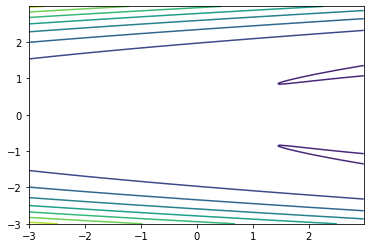

In [4]:
#2.2
import matplotlib.pyplot as plt
delta = 0.02
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*(2*Y**2-X)**2
fig, ax = plt.subplots()
ax.contour(X, Y, Z)

In [5]:
#2.3
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 - 100*(2*y**2-x) 
    df_dy = 400*y*(2*y**2 - x)
    return np.array([df_dx, df_dy])

In [6]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    
    if starting_point is None:
        point = np.random.uniform(-5,-4,size=2)
    else:
        point=starting_point
   
    trajectory=[point]
    
    for i in range(iterations):
        grad=grad_f(point)
        point=point - learning_rate * grad
        trajectory.append(point)
        
    return np.array(trajectory)

[[-4.22867936e+00 -4.97924805e+00]
 [-4.22324426e+00 -4.87206575e+00]
 [-4.21802102e+00 -4.77131670e+00]
 ...
 [-1.33399355e+00 -9.72127351e-05]
 [-1.33385481e+00 -9.71608627e-05]
 [-1.33371609e+00 -9.71090233e-05]]
[[-4.36635177e+00 -4.25119612e+00]
 [-4.32526813e+00 -3.56230358e+00]
 [-4.29500161e+00 -3.13902666e+00]
 ...
 [-1.64438548e-04 -2.49931641e-07]
 [-1.64274108e-04 -2.49931477e-07]
 [-1.64109833e-04 -2.49931313e-07]]
[[-4.50149299e+00 -4.77520335e+00]
 [-3.99434768e+00  4.79557001e+00]
 [-3.48966793e+00 -4.79352346e+00]
 ...
 [ 1.98168172e-07  3.14776247e-04]
 [ 1.98168172e-07  3.14776247e-04]
 [ 1.98168172e-07  3.14776247e-04]]


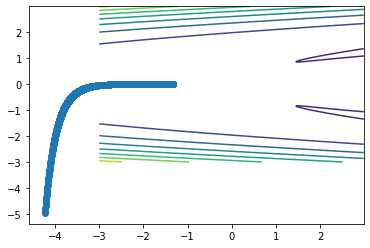

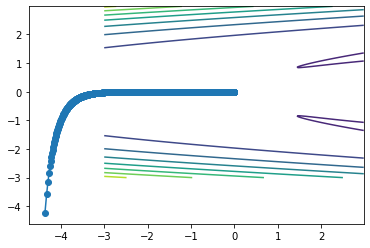

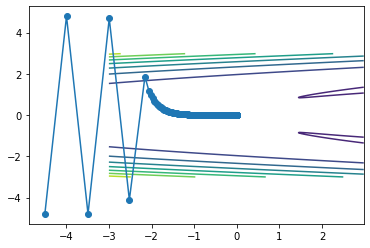

In [7]:
np.random.seed(10)
learning_rate_list = [0.000001, 0.00001, 0.0001]
for i in learning_rate_list:
    traj = grad_descent(iterations=10000,learning_rate=i)
    print(traj)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

In [20]:
#2.4
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is None:
        point = np.random.uniform(-5,-4,size=2)
    else:
        point=starting_point       
    trajectory=[point]
    v = np.zeros(point.size) 
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon * grad
        point = point - v
        trajectory.append(point)    
    return np.array(trajectory)

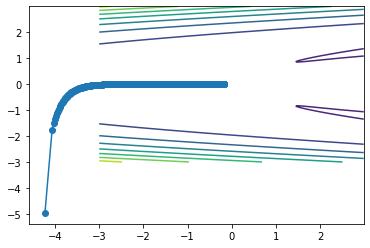

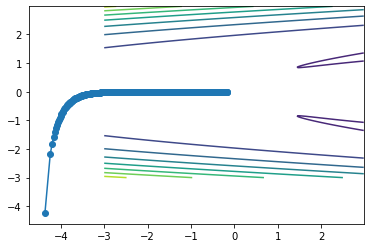

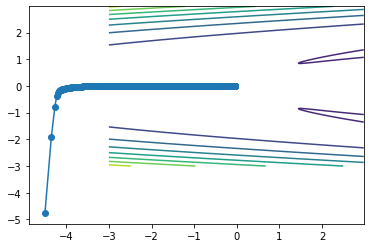

In [21]:
np.random.seed(10)
alphas = [.01,.002,.3]
for i in alphas:
    traj = grad_descent_with_momentum(iterations=1000, epsilon=0.00003, alpha=i)
    #print(traj)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

### p3

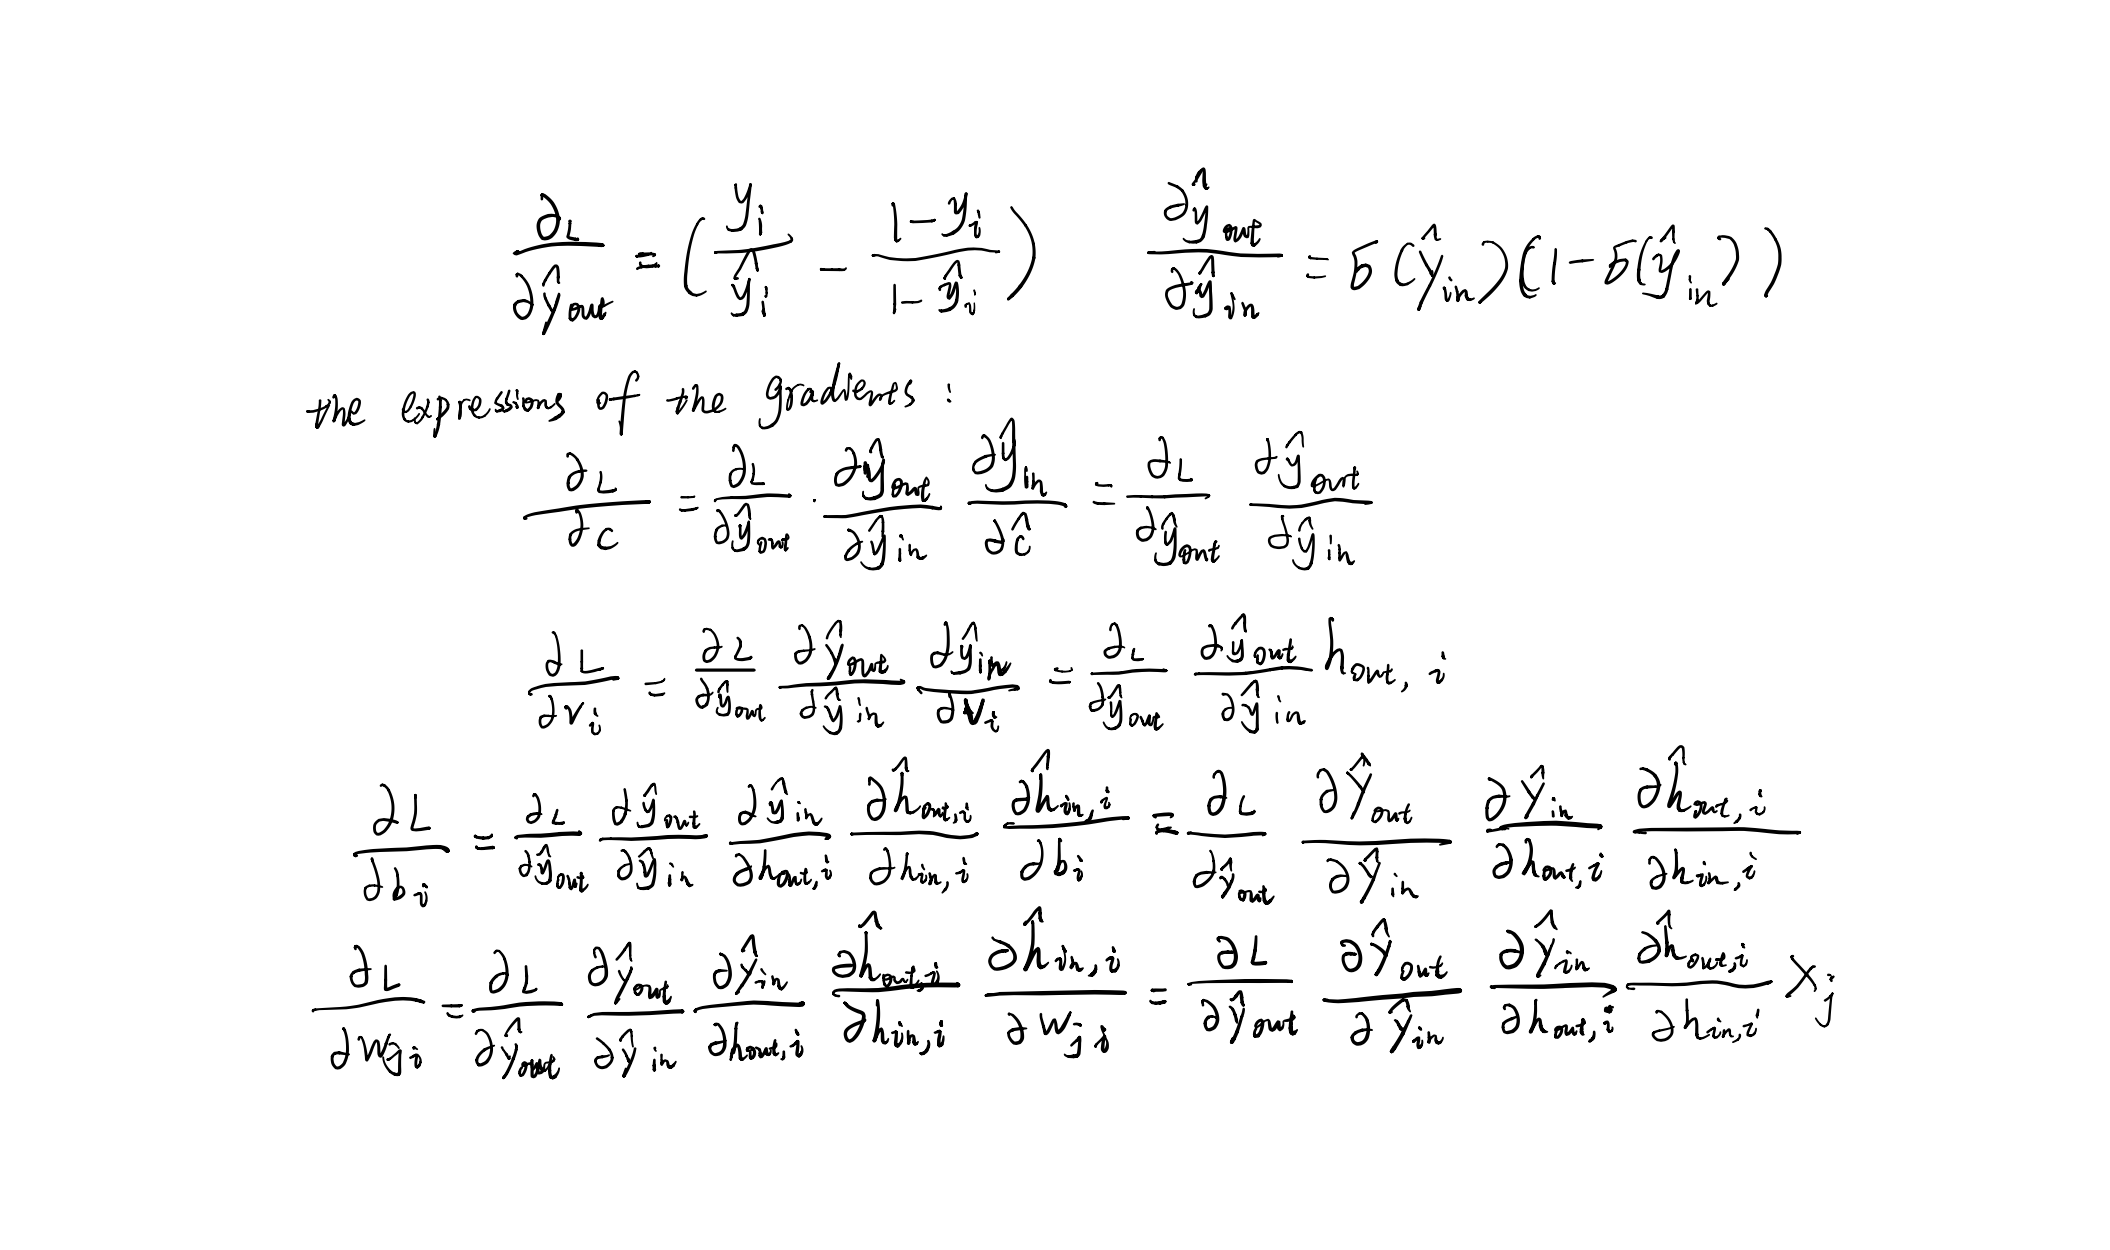

In [22]:
#3.1
from IPython.display import Image
Image("3.jpeg")

In [23]:
#3.2
def de_relu(x):
    return np.where(x>0, 1, 0)
def loss_function(y, y_hat):
     return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).sum()
def grad_f(x,y,w1,v,b,c):  
    a = np.dot(x,w1)+b
    h1 = relu(a)
    y_hat = sigmoid(np.dot(h1,v)+c)
    Loss = loss_function(y, y_hat)
    dL_dc = (y_hat-y).sum()
    dL_dv = np.dot(h1.T, y_hat - y)
    dL_db = (np.dot(y_hat - y, v.T) * de_relu(a)).sum(axis=0)
    dL_dw = np.dot(x.T, np.dot(y_hat-y, v.T)*de_relu(a))      
    return (dL_dw, dL_dv, dL_db, dL_dc)

In [24]:
w1 = np.random.randn(8).reshape(2,4)
v = np.random.randn(4).reshape(4,1)
b = np.random.randn(4).reshape(1,4)
c = np.random.randn(1)

x = np.random.randn(1000).reshape((500,2))
y = np.random.randn(500).reshape((500,1))

grad_f(x,y,w1,v,b,c)

(array([[  6.32230437, -48.26097422,  -8.16426486,  -3.88226497],
        [ -6.12589719, -20.4139948 ,   2.67237551,  13.00518525]]),
 array([[ -0.32768838],
        [ 46.23125712],
        [133.62294926],
        [ 14.13619198]]),
 array([ 3.15479367, 68.24254732, 21.25964564,  8.27164161]),
 94.65168100023462)

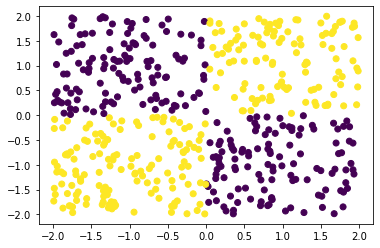

In [25]:
#3.3
x_xor = np.random.uniform(low = -2,high = 2, size=1000).reshape((500,2))
y_xor = np.zeros((500,1))
y_xor[np.logical_and(x_xor[:,0] > 0, x_xor[:,1] > 0)] = 1
y_xor[np.logical_and(x_xor[:,0] < 0, x_xor[:,1] < 0)] = 1
plt.scatter(x_xor[:,0], x_xor[:,1], c = y_xor[:,0])
plt.show()

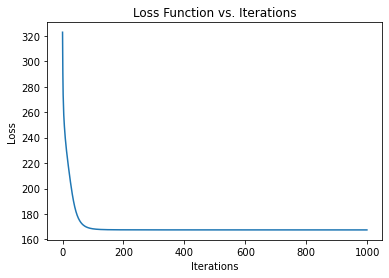

In [26]:
#3.4
x = x_xor
y = y_xor
w1 = np.array([[1, -1, 0,1],
             [0, 0, .5,1]])
b = np.array([0, 0, 1,0])
v = np.array([[1], [0], [-1],[1]])
c = np.array([1])
alpha = 0.001
loss = []
for i in range(1000):
        dL_dw, dL_dv, dL_db, dL_dc = grad_f(x,y,w1,v,b,c)    
        w1 = w1 - alpha * dL_dw
        b = b - alpha * dL_db
        v = v - alpha * dL_dv
        c = c - alpha * dL_dc    
        a = np.dot(x,w1)+b
        h1 = relu(a)
        y_hat = sigmoid(np.dot(h1,v) + c)
        loss.append (- sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
plt.plot(range(0,1000), loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function vs. Iterations')
plt.show()

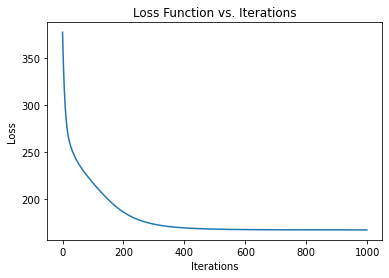

In [27]:
#3.5
x = x_xor
y = y_xor

w1 = np.array([[1, -1, 0,1],
             [0, 0, .5,1]])
b = np.array([0, 0, 1,0])
v = np.array([[1], [0], [-1],[1]])
c = np.array([1])

velocity = np.zeros(x.size)
params = (w1, v, b, c)

trajectory = []
loss = []

alpha = 0.0001
epsilon = 0.0001

for i in range(5000):    
    gradients = grad_f(x,y,w1,v,b,c)
    new_params = []  
    for (i, m, v) in zip(params, gradients, velocity):
        new_params.append(i - epsilon * m - alpha * v)
        
    velocity = gradients
    params = tuple(new_params)
    
    w1, v, b, c = params
    
    a = np.dot(x,w1)+b
    h1 = relu(a)
    y_hat = sigmoid(np.dot(h1,v) + c)
    
    trajectory.append(params)
    loss.append(- sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
plt.plot(range(0,1000), loss[0:1000])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function vs. Iterations')
plt.show()

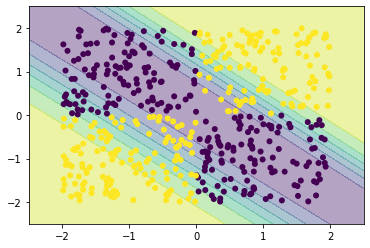

In [28]:
#3.6
def get_y_hat(x, params):
    W, V, b, c = params
    h = relu(np.dot(x, W) + b)
    y = sigmoid(np.dot(h, V) + c)
    return y
x_span = np.linspace(-2.5, 2.5, 1000)
y_span = np.linspace(-2.5, 2.5, 1000)
xx, yy = np.meshgrid(x_span, y_span)
values = get_y_hat(np.c_[xx.ravel(), yy.ravel()], trajectory[-1])
z = values.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.4)
ax.scatter(x[:,0],x[:,1], c=y[:,0], lw=0)
plt.show()